In [457]:
import pandas as pd

In [458]:
columns=['comments','date','color','size','plus','minuse','rate','name','brand']

In [464]:
df=pd.read_json('/home/sv/Dev/Dev_bootcamp/Wildberries_bot/5044562.jl')

In [465]:
df=df.transpose().reset_index().drop('index', axis=1)


In [466]:
df=df.rename(columns={0:'comments',1:'date',2:'color',3:'size',4:'plus',5:'minuse',6:'rate',7:'name',8:'brand'})

In [467]:
df

,comments,date,color,size,plus,minuse,rate,name,brand
0,"Отличный пылесос, свою функцию выполняет , пыл...",2021-05-02T15:45:07Z,,0,1,0,5,Пылесос GL6256,GALAXY
1,Всасывает хорошо. Шнура достаточно. На фильтр ...,2021-05-02T13:47:36Z,,0,1,0,5,Пылесос GL6256,GALAXY
2,"Для этой цены, пылесос отличный. Очень лёгкий ...",2021-05-02T11:38:03Z,,0,2,0,5,Пылесос GL6256,GALAXY
3,Пылесос очень-очень хороший! Любимец мой! Втор...,2021-05-02T06:17:10Z,,0,2,0,5,Пылесос GL6256,GALAXY
4,Отличный за эту цену!!!!,2021-05-01T16:51:28Z,,0,1,0,5,Пылесос GL6256,GALAXY
...,...,...,...,...,...,...,...,...,...
3431,"Отличный пылесос, легко собирается.",2019-09-26T08:01:16.536772217Z,"голубой, белый",0,3,5,5,Пылесос GL6256,GALAXY
3432,ОЧЕНЬ УДОБНО И ХОРОШО,2019-11-20T12:46:21.171350589Z,"голубой, белый",0,1,1,5,Пылесос GL6256,GALAXY
3433,"Удобный, лёгкий малыш. Тянен хорошо. За такие ...",2019-11-20T08:35:32.786532909Z,"голубой, белый",0,1,1,5,Пылесос GL6256,GALAXY
3434,спасибо все отлично работает советую,2019-11-20T06:29:51.268463604Z,"голубой, белый",0,0,1,5,Пылесос GL6256,GALAXY


создать отдельный файл и назвать preprocessing_tools


In [424]:
import re

import nltk
from nltk.corpus import stopwords

def delete_non_letters(words):
    new_words = []
    for word in words:
        new_word = "".join(c for c in word if c.isalpha())
        if new_word != '':
            new_words.append(new_word)
    return new_words

def delete_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english') and word not in stopwords.words('russian'):
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def normalize(text, tokenized=False, del_stopwords=False):
    if not tokenized:
        text = nltk.word_tokenize(text)
    
    text = delete_non_letters(text)
    if del_stopwords:
        text = delete_stopwords(text)
        
    text = to_lowercase(text)
    
    text = [word for word in text if len(word) > 1]
    return text


In [425]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import numpy as np
from numpy.random import choice

import nltk
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.model_selection import train_test_split

from os.path import join
from glob import glob

#import preprocessing_tools as pt
from tqdm import tqdm_notebook as tqdm

import pickle

from os import mkdir 
from shutil import move

In [426]:
 #loading data
#data_path = '../Data/raw_data'

#template = join(data_path,'*.txt')
#filenames = glob(template)
#print(len(filenames))

In [427]:
 #Let`\s tokenize all texts and collect texts lenghts to see texts lengths distribution.
import nltk
nltk.download('punkt')
texts_lens = []
tok_text_arr=[]
for name in df['comments']:
   # with open(name, 'r') as f:
        text = name
        tok_text = nltk.word_tokenize(text)
        tok_text = normalize(tok_text, tokenized=True)
        tok_text_arr.append(tok_text)
        texts_lens.append(len(tok_text))

df['tok_comments']= [','.join(i) for i in tok_text_arr ]
df

[nltk_data] Downloading package punkt to /home/sv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comments,date,color,size,plus,minuse,rate,name,brand,tok_comments
0,Отличный за эту цену!!!!,2021-05-01T16:51:28Z,,0,1,0,5,Пылесос GL6256,GALAXY,"отличный,за,эту,цену"
1,Все отлично. Всасывает даже комточки от финико...,2021-05-01T15:04:18Z,,0,1,0,5,Пылесос GL6256,GALAXY,"все,отлично,всасывает,даже,комточки,от,фиников..."
2,"Пылесос отличный, работает супер, мощный. Очис...",2021-05-01T11:12:07Z,,0,1,0,5,Пылесос GL6256,GALAXY,"пылесос,отличный,работает,супер,мощный,очистил..."
3,Хороший пылесос. Компактный. Дома линолеум и п...,2021-05-01T07:32:57Z,,0,1,0,5,Пылесос GL6256,GALAXY,"хороший,пылесос,компактный,дома,линолеум,плитк..."
4,"Плохо выполняет свои функции, ужасно. Плохой п...",2021-05-01T06:50:42Z,,0,0,1,1,Пылесос GL6256,GALAXY,"плохо,выполняет,свои,функции,ужасно,плохой,пла..."
...,...,...,...,...,...,...,...,...,...,...
3427,спасибо все отлично работает советую,2019-11-20T06:29:51.268463604Z,"голубой, белый",0,0,1,5,Пылесос GL6256,GALAXY,"спасибо,все,отлично,работает,советую"
3428,Приобрела за 1372. Отличный помощник за эти де...,2019-11-20T04:47:40.860265718Z,"голубой, белый",0,1,1,5,Пылесос GL6256,GALAXY,"приобрела,за,отличный,помощник,за,эти,деньги,л..."
3429,"пылесос проверили в пункте выдачи, заполнили в...",2019-11-19T13:36:30.630725501Z,"голубой, белый",0,2,1,5,Пылесос GL6256,GALAXY,"пылесос,проверили,пункте,выдачи,заполнили,все,..."
3430,Офигенный пылесос. Купила почти за 1000 руб. к...,2019-11-19T12:54:38.765041548Z,"голубой, белый",0,3,2,5,Пылесос GL6256,GALAXY,"офигенный,пылесос,купила,почти,за,руб,купила,с..."


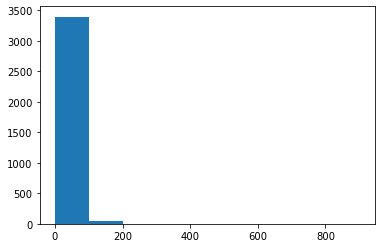

In [428]:
plt.hist(texts_lens, bins=[i * 100 for i in range(int(1000/100))])
plt.show()

In [429]:
max(texts_lens)

147

In [430]:
df.loc[0,'name'].split()[0]

'Пылесос'

In [431]:
#loading stopwords from all the sources we got

#loading text files with external stopwords
#merging via set.update()
#stopwords_path = join('../Data/stopwords/raw_stopwords')
#stopwords_template = join(stopwords_path, '*.txt')
#stopwords_files = glob(stopwords_template)
#extra_stopwords = set()
#for name in stopwords_files:
#    with open(name, 'r') as f:
#        words = f.readlines()
#        words = [word.strip() for word in words]
#        extra_stopwords.update(set(words))

#Also putting there nltk stopwords
stopwords = set()
stopwords.update(set(nltk_stopwords.words('english')))
stopwords.update(set(nltk_stopwords.words('russian')))
#stopwords.update(extra_stopwords)

#some euristically added stopwords
custom_stopwords = set(['http', 'https', 'ru', 'com', 'vk',
                         'привет', 'здравствуйте', 'например', 'репост',df.loc[0,'name'].split()[0]])

#stopwords from final LDA tuning
#comment this piece it if you haven`t got them.

#final_stopwords_path = join(stopwords_path, 'final_extra_stopwords.pkl')
#with open(final_stopwords_path, 'rb') as f:
 #   stopwords_from_top = pickle.load(f)
#stopwords.update(set(stopwords_from_top))

stopwords.update(custom_stopwords)
stopwords = list(stopwords)
print('Total numver of stopwords:', len(stopwords))

#serializing all-merged stopwords set
#with open('../Data/stopwords/stopwords.pkl', 'wb') as f:
 #   pickle.dump(stopwords, f)

Total numver of stopwords: 340


In [432]:
stopwords

['он',
 'under',
 'есть',
 'both',
 'что',
 'the',
 'какой',
 'wasn',
 'чтоб',
 'not',
 'herself',
 'мы',
 'тебя',
 'репост',
 'чтобы',
 'does',
 'by',
 'any',
 "that'll",
 "it's",
 'так',
 'm',
 'or',
 'up',
 'куда',
 'ни',
 'doesn',
 'he',
 'я',
 'себя',
 'в',
 'иногда',
 'then',
 'll',
 'just',
 'же',
 'ты',
 'our',
 'and',
 'всю',
 'здравствуйте',
 'лучше',
 'same',
 'during',
 'было',
 'about',
 'опять',
 'над',
 'ним',
 'what',
 'него',
 'был',
 'if',
 'some',
 'надо',
 'потом',
 'когда',
 'вот',
 'чем',
 "you're",
 'that',
 'd',
 'other',
 'a',
 'где',
 'below',
 'in',
 "won't",
 "wouldn't",
 'чего',
 'об',
 'himself',
 'most',
 'во',
 'более',
 'nor',
 'before',
 "hadn't",
 'меня',
 'там',
 'были',
 "aren't",
 'этой',
 'very',
 'вы',
 "you'd",
 'to',
 'isn',
 'после',
 'если',
 'is',
 'doing',
 "weren't",
 'now',
 "mustn't",
 'за',
 'все',
 'ли',
 'an',
 'у',
 'нельзя',
 'me',
 'тут',
 'weren',
 'между',
 'да',
 'еще',
 'own',
 "hasn't",
 'at',
 'theirs',
 'была',
 'из',
 'too'

 # Idf filtering

In [271]:
!pip install pymystem3

In [433]:
%matplotlib inline
#adding this to avoid memory errors
#%env JOBLIB_TEMP_FOLDER=/tmp
import numpy as np

from tqdm import tqdm_notebook as tqdm

#from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split
import pickle

import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
import re

from os.path import join
from glob import glob

from time import time

In [434]:
#'training' (tf-)idf vectorizer.
tf_idf = TfidfVectorizer()

In [435]:
df['tok_comments'].to_numpy()

array(['отличный,за,эту,цену',
       'все,отлично,всасывает,даже,комточки,от,фиников,маслин,ним,легко,пылесосить',
       'пылесос,отличный,работает,супер,мощный,очистил,коврик,прихожей,ванной,теперь,как,новые,но,пришел,разорванной,коробке,все,детали,на,месте',
       ...,
       'пылесос,проверили,пункте,выдачи,заполнили,все,документы,проверила,дома,пока,все,на,отлично,шерсть,от,двух,собак,собирает,очень,хорошо,по,ламинату,ковров,меня,нет,так,что,не,могу,ничего,сказатьшнур,немного,коротковат,на,всю,квартиру,не,хватает,но,удлинитель,помощь',
       'офигенный,пылесос,купила,почти,за,руб,купила,себе,мамам,отлично,справляется,ламинатом,ковром,плиткой,собирает,всю,шерсть,короче,восторге',
       'отличный,пылесос,за,эти,деньги,хорошо,сосёт,но,шумный,как,писали,все,до,меня,так,рекомендую'],
      dtype=object)

In [436]:
tf_idf.fit(df['tok_comments'].to_numpy())

TfidfVectorizer()

In [437]:
#getting idfs
idfs = tf_idf.idf_
idfs

array([8.44804261, 8.44804261, 8.44804261, ..., 8.44804261, 8.44804261,
       8.44804261])

In [438]:



#sorting out too rare and too common words
#original 1.3 and 7
# 2 6
lower_thresh = 3.
upper_thresh = 6.
not_often = idfs > lower_thresh
not_rare = idfs < upper_thresh

mask = not_often * not_rare

good_words = np.array(tf_idf.get_feature_names())[mask]
#deleting punctuation as well.
cleaned = []
for word in good_words:
    word = re.sub("^(\d+\w*$|_+)", "", word)
    
    if len(word) == 0:
        continue
    cleaned.append(word)
print("Len of original vocabulary: %d\nAfter filtering: %d"%(idfs.shape[0], len(cleaned)))

Len of original vocabulary: 9215
After filtering: 499


# Stemming

In [439]:
#Stemming
m = Mystem()
stemmed = set()
voc_len = len(cleaned)
for i in tqdm(range(voc_len)):
    word = cleaned.pop()
    stemmed_word = m.lemmatize(word)[0]
    stemmed.add(stemmed_word)
    
stemmed = list(stemmed)
print('After stemming: %d'%(len(stemmed)))

<ipython-input-439-3c28adbad111>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(voc_len)):



After stemming: 347


# Term-doc matrix

In [440]:
#training count vectorizer
voc = {word : i for i,word in enumerate(stemmed)}

count_vect = CountVectorizer(
                             
                             vocabulary=voc)

dataset = count_vect.fit_transform(df['tok_comments'].to_numpy())

#  LDA

In [441]:
#training LDA
lda = LDA(n_components = 60, max_iter=30, n_jobs=6, learning_method='batch', verbose=1)
lda.fit(dataset)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


LatentDirichletAllocation(max_iter=30, n_components=60, n_jobs=6, verbose=1)

In [442]:
LDA(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=30, mean_change_tol=0.001,
             n_components=60, n_jobs=6,  perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

LatentDirichletAllocation(max_iter=30, n_components=60, n_jobs=6, verbose=1)

In [443]:
#Let\`s do simple interface class
class TopicModeler(object):
    '''
    Inteface object for CountVectorizer + LDA simple
    usage.
    '''
    def __init__(self, count_vect, lda):
        '''
        Args:
             count_vect - CountVectorizer object from sklearn.
             lda - LDA object from sklearn.
        '''
        self.lda = lda
        self.count_vect = count_vect
        self.count_vect.input = 'content'
        
    def __call__(self, text):
        '''
        Gives topics distribution for a given text
        Args:
             text - raw text via python string.
        returns: numpy array - topics distribution for a given text.
        '''
        vectorized = self.count_vect.transform([text])
        lda_topics = self.lda.transform(vectorized)
        return lda_topics
    def get_keywords(self, text, n_topics=3, n_keywords=5):
        '''
        For a given text gives n top keywords for each of m top texts topics.
        Args:
             text - raw text via python string.
             n_topics - int how many top topics to use.
             n_keywords - how many top words of each topic to return.
        returns:
                list - of m*n keywords for a given text.
        '''
        lda_topics = self(text)
        lda_topics = np.squeeze(lda_topics, axis=0)
        n_topics_indices = lda_topics.argsort()[-n_topics:][::-1]
        
        top_topics_words_dists = []
        for i in n_topics_indices:
            top_topics_words_dists.append(self.lda.components_[i])
        
        keywords = np.zeros(shape=(n_keywords*n_topics, self.lda.components_.shape[1]))
        for i,topic in enumerate(top_topics_words_dists):
            n_keywords_indices = topic.argsort()[-n_keywords:][::-1]
            for k,j in enumerate(n_keywords_indices):
                keywords[i * n_keywords + k, j] = 1
        keywords = self.count_vect.inverse_transform(keywords)
        keywords = [keyword[0] for keyword in keywords]
        return keywords  

In [444]:
text=''.join(df['tok_comments'].to_numpy())
text

'отличный,за,эту,ценувсе,отлично,всасывает,даже,комточки,от,фиников,маслин,ним,легко,пылесоситьпылесос,отличный,работает,супер,мощный,очистил,коврик,прихожей,ванной,теперь,как,новые,но,пришел,разорванной,коробке,все,детали,на,местехороший,пылесос,компактный,дома,линолеум,плитка,со,своей,функцией,справляется,отлично,рекомендуюплохо,выполняет,свои,функции,ужасно,плохой,пластик,плохая,система,разберитесь,этимпылесос,хороший,собирает,пыль,кошачьи,волосы,хорошо,покупкой,довольнаоднозначно,супер,пылесос,после,пользования,приобрела,для,дочерипылесос,просто,огонь,заказала,ещё,доченьке,рекомендую,спасибо,валбериссупер,мощный,маленький,пылесосхороший,для,своей,ценызаказала,пылесос,забрала,апреля,коробка,разорвана,облекаяна,скотчем,сзади,может,вывалиться,ну,это,ладно,нету,ручки,что,мне,делать,этим,полупылесосом,очень,разочарована,вернуть,нельзя,так,понимаюне,нарадуюсь,работает,четвертый,месяц,без,проблем,за,такую,цену,просто,чудесная,штукаэлектро,веник,супержаль,что,на,коробке,нет,защитных,пломб,

In [445]:
tm = TopicModeler(count_vect, lda)

In [448]:
 #Let`s what words it will give us for the choosen text.
key_words = tm.get_keywords(text, n_topics=1, n_keywords=20)
print(key_words)

['он', 'что', 'ну', 'сказать', 'себя', 'так', 'по', 'это', 'да', 'даже', 'может', 'нужно', 'мой', 'плюс', 'длинный', 'много', 'всего', 'сначала', 'этот', 'потому']


пропустила кусок!!!

# Making texts embeddings

In [379]:
term_doc_matrix = count_vect.transform(df['tok_comments'])
embeddings = lda.transform(term_doc_matrix)

In [380]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, AffinityPropagation, SpectralClustering, KMeans

In [381]:
kmeans = KMeans(n_clusters=3)
clust_labels = kmeans.fit_predict(embeddings)
clust_centers = kmeans.cluster_centers_

In [382]:
embeddings_to_tsne = np.concatenate((embeddings,clust_centers), axis=0)

tSNE =  TSNE(n_components=2, perplexity=15)
tsne_embeddings = tSNE.fit_transform(embeddings_to_tsne)
tsne_embeddings, centroids_embeddings = np.split(tsne_embeddings, [len(clust_labels)], axis=0)

In [383]:
print(tsne_embeddings.shape,centroids_embeddings.shape)

(977, 2) (3, 2)


In [384]:
clust_indices = np.unique(clust_labels)

clusters = {clust_ind : [] for clust_ind in clust_indices}
for emb, label in zip(tsne_embeddings, clust_labels):
    clusters[label].append(emb)

for key in clusters.keys():
    clusters[key] = np.array(clusters[key])
colors = cm.rainbow(np.linspace(0, 1, len(clust_indices)))

In [391]:
count=0
for i in range(len(clust_labels)):
    if clust_labels[i]==0:
        print(df['comments'][i])
 

Конверт для выписки вместо худи, серьезно?! Ну какого фига, ВБ?!
Это просто самое бомбовое худи которое только может быть, цвет соответствует, оно максимально уютное, мягкое, швы все идеальные, нитки нигде не торчат, на мои параметры( ОГ-101; ОТ-90 ; ОБ-114) село как по мне идеально, я в восторге, теперь хочу такое желтое или красное😍
Спасибо за отличный товар!
Очень понравилось худи )Все качественно сшито, приятный мягкий материал, тёплое и уютное )Увидела у подруги и решила заказать себе . До первой стирки , не много будут оставаться катышки с внутренней стороны на одежде , но это во всех изделиях такого плана. Стираю при температуре 20-30 градусов на щадящем режиме . Чтоб подклад "не сыпался " нужно после первой стирке хорошо прогладить с внутренней стороны ) Закажу себе в другом цвете )
худи действительно огромное, но с таким расчётом и брала - носить дома в прохладный сезон. очень уютная вещичка, как кокон. на миниатюрных ледях будет смотреться комично (: 
Худи не плохое, из всех,

In [386]:

#for i in embeddings:
#    for j in clusters[0]:
#        if 
count=0
for i in centroids_embeddings:
    print(i)
    print('*******')
    count+=1
print(count)    

[-7.5465236  1.5479171]
*******
[ 23.18273  -28.961548]
*******
[37.47648 24.07789]
*******
3


In [377]:

count=0
for i in clusters[0]:
    print(i)
    print('*******')
    count+=1
print(count)   

[46.23123   7.505808]
*******
[23.225248   5.4044952]
*******
[ 24.308975 -36.99471 ]
*******
[21.226547  3.351474]
*******
[21.762081   6.2822857]
*******
[31.881859 24.43531 ]
*******
[ 3.808778 25.26431 ]
*******
[26.093792  -7.5292797]
*******
[11.322559    0.30533183]
*******
[45.589466  8.519909]
*******
[22.438288  8.027131]
*******
[-23.241865   -1.6898085]
*******
[30.26724  26.001558]
*******
[33.187332 26.65007 ]
*******
[26.948431  8.942744]
*******
[-8.263897 42.421696]
*******
[25.504574  4.407606]
*******
[28.704453   3.9657328]
*******
[45.8901    6.965314]
*******
[47.614403  7.144531]
*******
[31.008968 27.800892]
*******
[ 22.798656 -16.73651 ]
*******
[-14.514789 -17.009745]
*******
[-20.668694  -1.700587]
*******
[32.662228 26.27693 ]
*******
[28.456728   7.4642973]
*******
[46.1955     6.1090355]
*******
[48.35556    7.2587314]
*******
[46.313156   6.0863957]
*******
[27.147318  7.391115]
*******
[ 15.879003 -41.978745]
*******
[18.830627  -3.9011264]
*******
[-22

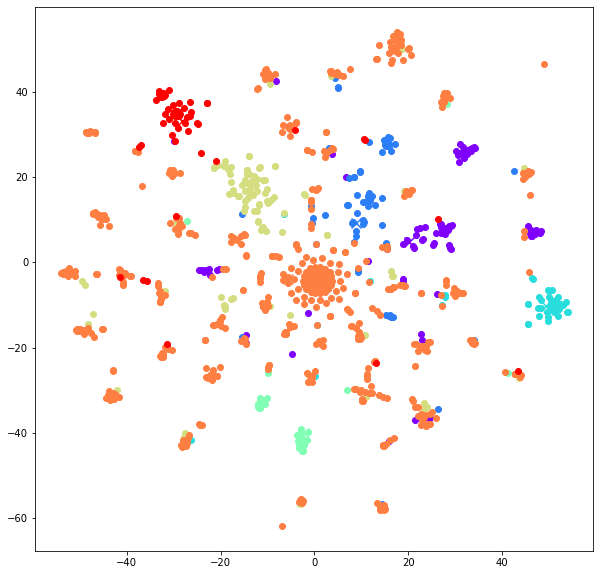

In [341]:
 plt.figure(figsize=(10,10))
for ind, color in zip(clust_indices, colors):
    x = clusters[ind][:,0]
    y = clusters[ind][:,1]
    plt.scatter(x, y, color=color)
    
    centroid = centroids_embeddings[ind]
    plt.scatter(centroid[0],centroid[1], color=color, marker='x', s=100)

plt.show()

In [411]:
text_link = 'https://www.wildberries.ru/catalog/5044562/detail.aspx?targetUrl=XS'
text_template = r'wildberries\.ru\/catalog\/\d*'
result = re.findall(text_template, text_link)

In [415]:

final_link=[]
final_link.append(f'https://www.{result[0]}/otzyvy')

In [416]:
final_link

['https://www.wildberries.ru/catalog/5044562/otzyvy']

In [417]:
''.join(final_link)

'https://www.wildberries.ru/catalog/5044562/otzyvy'

In [450]:
final_link[0][35:-7]


'5044562'